# Apriori Algorithm

In [1]:
import pandas as pd

In [2]:
# Use for transaction dataset into one hot encoding format
from mlxtend.preprocessing import transactionencoder

In [3]:
from mlxtend.frequent_patterns import apriori,association_rules 

In [4]:
df=pd.read_csv(r'C:\Users\MOTIRAM SINGH\Desktop\example file\basket_analysis.csv')

In [5]:
df.shape

(999, 17)

In [6]:
pd.set_option('display.max_rows',1000)

In [7]:
df

,Unnamed: 0,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,5,True,True,True,True,False,True,False,True,False,False,True,False,False,True,True,True
6,6,False,False,True,False,False,False,True,True,True,True,True,True,False,False,True,False
7,7,True,False,False,True,False,False,True,False,False,False,True,False,True,False,True,False
8,8,True,False,False,False,True,True,True,True,False,True,True,True,True,True,True,True
9,9,True,False,False,False,False,True,True,True,False,True,False,True,True,True,False,True


In [8]:
df.columns

Index(['Unnamed: 0', 'Apple', 'Bread', 'Butter', 'Cheese', 'Corn', 'Dill',
       'Eggs', 'Ice cream', 'Kidney Beans', 'Milk', 'Nutmeg', 'Onion', 'Sugar',
       'Unicorn', 'Yogurt', 'chocolate'],
      dtype='object')

In [9]:
df=df.drop('Unnamed: 0',axis=1)

In [10]:
df.columns

Index(['Apple', 'Bread', 'Butter', 'Cheese', 'Corn', 'Dill', 'Eggs',
       'Ice cream', 'Kidney Beans', 'Milk', 'Nutmeg', 'Onion', 'Sugar',
       'Unicorn', 'Yogurt', 'chocolate'],
      dtype='object')

In [11]:
# Finding the null Value althoug transaction data having a null value is not a general occurence 
df.isna().sum()

Apple           0
Bread           0
Butter          0
Cheese          0
Corn            0
Dill            0
Eggs            0
Ice cream       0
Kidney Beans    0
Milk            0
Nutmeg          0
Onion           0
Sugar           0
Unicorn         0
Yogurt          0
chocolate       0
dtype: int64

In [12]:
df.mean()

Apple           0.383383
Bread           0.384384
Butter          0.420420
Cheese          0.404404
Corn            0.407407
Dill            0.398398
Eggs            0.384384
Ice cream       0.410410
Kidney Beans    0.408408
Milk            0.405405
Nutmeg          0.401401
Onion           0.403403
Sugar           0.409409
Unicorn         0.389389
Yogurt          0.420420
chocolate       0.421421
dtype: float64

In [13]:
#It will give the frequent items, with set of 3 or less and only shows which have support of 0.08 or more
fre_itmset=apriori(df,max_len=3,min_support=0.08,use_colnames=True)

In [14]:
fre_itmset

,support,itemsets
0,0.383383,(Apple)
1,0.384384,(Bread)
2,0.420420,(Butter)
3,0.404404,(Cheese)
4,0.407407,(Corn)
5,0.398398,(Dill)
6,0.384384,(Eggs)
7,0.410410,(Ice cream)
8,0.408408,(Kidney Beans)
9,0.405405,(Milk)


In [15]:
# This one will give you the association rule
rule=association_rules(fre_itmset,min_threshold=0.1,metric='support')
rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Apple),(Bread),0.383383,0.384384,0.154154,0.402089,1.046059,0.006788,1.029610
1,(Bread),(Apple),0.384384,0.383383,0.154154,0.401042,1.046059,0.006788,1.029482
2,(Butter),(Apple),0.420420,0.383383,0.188188,0.447619,1.167549,0.027006,1.116289
3,(Apple),(Butter),0.383383,0.420420,0.188188,0.490862,1.167549,0.027006,1.138354
4,(Apple),(Cheese),0.383383,0.404404,0.162162,0.422977,1.045925,0.007120,1.032186
5,(Cheese),(Apple),0.404404,0.383383,0.162162,0.400990,1.045925,0.007120,1.029393
6,(Corn),(Apple),0.407407,0.383383,0.186186,0.457002,1.192025,0.029993,1.135579
7,(Apple),(Corn),0.383383,0.407407,0.186186,0.485640,1.192025,0.029993,1.152096
8,(Dill),(Apple),0.398398,0.383383,0.179179,0.449749,1.173104,0.026440,1.120609
9,(Apple),(Dill),0.383383,0.398398,0.179179,0.467363,1.173104,0.026440,1.129478


In [16]:
# Filtering 'rule' as per condition
rule_refined=rule[(rule['consequent support']>0.2)&(rule['antecedent support']>0.1)&(rule['confidence']>0.1)&(rule['lift']>1)]

In [17]:
rule_refined

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Apple),(Bread),0.383383,0.384384,0.154154,0.402089,1.046059,0.006788,1.029610
1,(Bread),(Apple),0.384384,0.383383,0.154154,0.401042,1.046059,0.006788,1.029482
2,(Butter),(Apple),0.420420,0.383383,0.188188,0.447619,1.167549,0.027006,1.116289
3,(Apple),(Butter),0.383383,0.420420,0.188188,0.490862,1.167549,0.027006,1.138354
4,(Apple),(Cheese),0.383383,0.404404,0.162162,0.422977,1.045925,0.007120,1.032186
5,(Cheese),(Apple),0.404404,0.383383,0.162162,0.400990,1.045925,0.007120,1.029393
6,(Corn),(Apple),0.407407,0.383383,0.186186,0.457002,1.192025,0.029993,1.135579
7,(Apple),(Corn),0.383383,0.407407,0.186186,0.485640,1.192025,0.029993,1.152096
8,(Dill),(Apple),0.398398,0.383383,0.179179,0.449749,1.173104,0.026440,1.120609
9,(Apple),(Dill),0.383383,0.398398,0.179179,0.467363,1.173104,0.026440,1.129478


In [18]:
rule_refined.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
403,"(Dill, Unicorn)",(chocolate),0.168168,0.421421,0.101101,0.601190,1.426578,0.030231,1.450764
390,"(Milk, Dill)",(chocolate),0.190190,0.421421,0.114114,0.600000,1.423753,0.033964,1.446446
325,"(Dill, Cheese)",(Onion),0.177177,0.403403,0.102102,0.576271,1.428523,0.030628,1.407968
392,"(Dill, chocolate)",(Milk),0.199199,0.405405,0.114114,0.572864,1.413065,0.033358,1.392051
260,"(Ice cream, Kidney Beans)",(Butter),0.196196,0.420420,0.110110,0.561224,1.334913,0.027625,1.320902
384,"(Dill, Ice cream)",(chocolate),0.185185,0.421421,0.103103,0.556757,1.321140,0.025062,1.305330
331,"(Ice cream, Cheese)",(Kidney Beans),0.187187,0.408408,0.104104,0.556150,1.361749,0.027655,1.332863
326,"(Onion, Cheese)",(Dill),0.185185,0.398398,0.102102,0.551351,1.383920,0.028325,1.340919
242,"(Apple, Sugar)",(Butter),0.182182,0.420420,0.100100,0.549451,1.306907,0.023507,1.286384
420,"(Milk, Nutmeg)",(Kidney Beans),0.182182,0.408408,0.100100,0.549451,1.345346,0.025695,1.313045


In [19]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\ProgramData\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:xlabel='support', ylabel='confidence'>

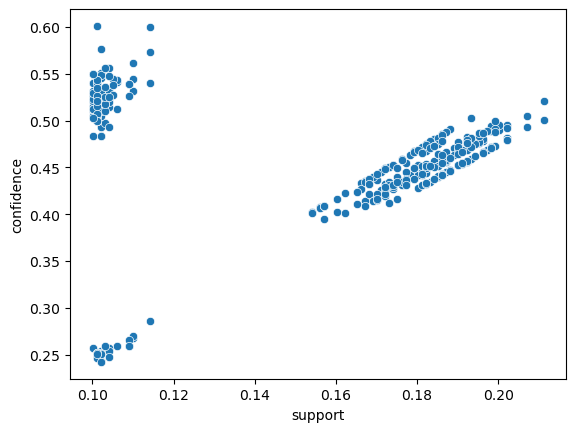

In [20]:
sns.scatterplot(y='confidence',x='support',data=rule_refined)